# Workshop 5: Finding Function Roots

Write Python functions `bisection.py`, `false_position.py` that implement respectively the bisection method, false position method, chord method, secant method and Newton's method.

The functions `bisection.py`, `false_position.py` should take as input:

- The interval endpoints [a,b], domain of f
- The name `fname` of the function whose root we want to find
- tolx: tolerance for the stopping criterion on the relative error between two successive iterations
- tolf: tolerance for the stopping criterion on the function value
- nmax: maximum number of iterations
    
Output:
- The function's root
- The number of iterations performed
- A list containing all the iterates xk

In [1]:
from math import copysign 

def sign(x):
  """
  Sign function that returns 1 if x is positive, 0 if x is zero and -1 if x is negative.
  """
  return copysign(1, x)

def bisection(fname, a, b, tolx):
    """
    Find a root of function fname in interval [a, b] using the bisection method.
    
    Parameters:
    fname : function - The function whose root we want to find
    a : float - Left interval endpoint
    b : float - Right interval endpoint
    tolx : float - Tolerance for solution precision

    Returns:
    c : float - The found root
    it : list - List of iterates (c values)
    """
    if sign(fname(a)) * sign(fname(b)) >= 0:
        return None, None  # No roots in interval

    it = []

    while abs(b - a) > tolx:
        c = (a + b) / 2
        it.append(c)
        
        if fname(c) == 0:  # If c is an exact root
            return c, it
        elif sign(fname(a)) * sign(fname(c)) < 0:  # Root is in [a, c]
            b = c
        else:  # Root is in [c, b]
            a = c

    return c, it  # Returns root approximation and iterates

def false_position(fname, a, b, tolx, tolf, nmax):   
    """
    Find a root of function fname in interval [a, b] using the false position method.
    
    Parameters:
    fname : function - The function whose root we want to find
    a : float - Left interval endpoint
    b : float - Right interval endpoint
    tolx : float - Tolerance for solution precision
    tolf : float - Tolerance for relative error calculation
    nmax : int - Maximum number of iterations

    Returns:
    c : float - The found root
    it : list - List of iterates (c values)
    """
    if sign(fname(a)) * sign(fname(b)) >= 0:
        return None, None  # No roots in interval
    
    e = tolx + 1
    prec = a
    it = []

    while len(it) < nmax and e > tolx:
        c = a - (fname(a) * (b - a)) / (fname(b) - fname(a))
        it.append(c)

        if fname(c) == 0:
            return c, it
        elif sign(fname(a)) * sign(fname(c)) < 0:  # Root is in [a, c]
            b = c
        else:  # Root is in [c, b]
            a = c

        if c != 0:
            e = abs(c - prec) / abs(c)
        else:
            e = abs(c - prec)
        
        prec = c

    return c, it  # Returns root approximation and iterates

## Exercise 1

Compare the methods implemented above in the following cases:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e−12, tolf = 1.e−12, (exact solution alpha=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2], tolx = 1.e−12, tolf = 1.e−12, (exact solution alpha=0);
- f(x) = log2(x + 3) − 2 in [−1, 2], tolx = 1.e−12, tolf = 1.e−12, (exact solution alpha=1);
- f(x) = sqrt(x)-(x^2)/4 in [1, 3], tolx = 1.e−12, tolf =1.e−12, (exact solution alpha=2**(4/3))

Show in a semilogarithmic plot on the y-axis (semilogy command) the trend of ek = |xk − α|, k = 1, ..., nit, knowing that α = 0, 1, 2**(4/3) in cases 2-4.

(5.999999999999943, [2.5, 5.25, 6.625, 5.9375, 6.28125, 6.109375, 6.0234375, 5.98046875, 6.001953125, 5.9912109375, 5.99658203125, 5.999267578125, 6.0006103515625, 5.99993896484375, 6.000274658203125, 6.0001068115234375, 6.000022888183594, 5.999980926513672, 6.000001907348633, 5.999991416931152, 5.999996662139893, 5.999999284744263, 6.000000596046448, 5.999999940395355, 6.0000002682209015, 6.000000104308128, 6.000000022351742, 5.9999999813735485, 6.000000001862645, 5.999999991618097, 5.999999996740371, 5.999999999301508, 6.000000000582077, 5.999999999941792, 6.0000000002619345, 6.000000000101863, 6.000000000021828, 5.99999999998181, 6.000000000001819, 5.9999999999918145, 5.999999999996817, 5.999999999999318, 6.000000000000568, 5.999999999999943])
(-1.999999999999476, [0.0, -1.0434782608695652, -1.6559200496866355, -1.892862328305268, -1.9683321234323525, -1.9907897331301452, -1.9973340529504027, -1.9992294020945331, -1.9997773464597712, -1.9999356748303525, -1.999981416919838, -1.99999

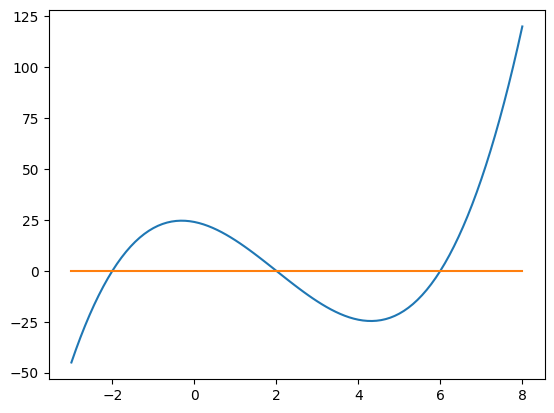

In [2]:
import matplotlib.pyplot as plt
import numpy as np

a1, b1 = -3, 8
xx = np.linspace(a1, b1,100)
f1 = lambda x: x**3 - 6 * x**2 - 4 * x + 24

print(bisection(f1, a1, b1, 1e-12))
print(false_position(f1, a1, b1, 1e-12, 1e-12, 1000))

plt.plot(xx, f1(xx), xx, np.zeros_like(xx))
plt.show()

## Exercise 2

- Use the bisection method to calculate the square root of 2. Analyze the results.

Solution:  1.4142135623724243 Iterates:  40


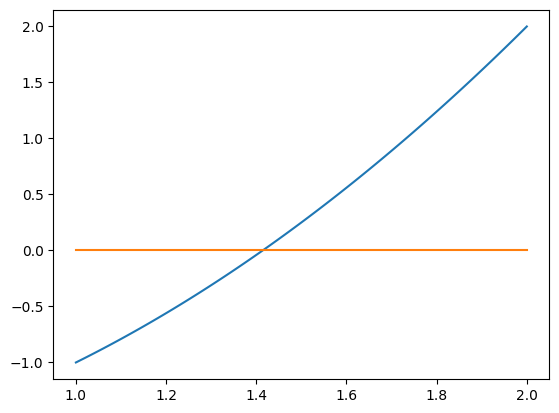

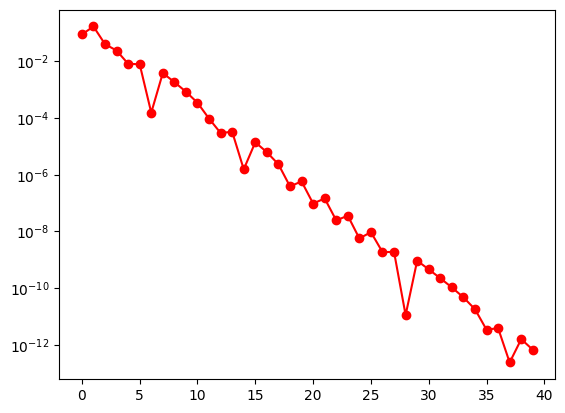

In [3]:
import numpy as np

f = lambda x: x**2 - 2

a, b = 1.0, 2.0
x = np.linspace(a, b, 100)

s, it = bisection(f, a, b, 1e-12)

print("Solution: ", s, "Iterates: ", len(it))

plt.plot(x, f(x), x, np.zeros_like(x))
plt.show()

alfa = np.sqrt(2)
err = np.abs(np.array(it) - alfa)

plt.semilogy(range(len(it)), err, 'r-o')
plt.show()

## Exercise 3
Write a NumPy function that calculates the infinity norm and the 1-norm of a vector and matrix and test it on vectors and matrices of your choice. Compare the results with those obtained using the norm function from numpy.linalg

(Remember the formula for matrix infinity norm and 1-norm:
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [4]:
import numpy as np

def norm_one(A):
    return np.max(np.sum(np.abs(A), axis=0))

def norm_inf(A):
    return np.max(np.sum(np.abs(A), axis=1))

A = np.array([[2.0],[3],[4],[5]])

print("My implementation: ", norm_one(A), "np norm one: ", np.linalg.norm(A, 1))
print("My implementation: ", norm_inf(A), "np norm inf: ", np.linalg.norm(A, np.inf))

My implementation:  14.0 np norm one:  14.0
My implementation:  5.0 np norm inf:  5.0


## Exercise 4
Implement a function that calculates the 2-norm of a matrix using the eigvals function from numpy.linalg (np.linalg.eigvals(A)). Test it on matrix A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]]) and compare the results with those obtained using the norm function from numpy.linalg

In [5]:
import numpy as np 

def norm_two(A):
    return np.sqrt(np.abs(np.max(np.linalg.eigvals(A.T @ A))))

A = np.array([[4, -1, 6], [2, 3, -3], [1, -2, 9/2]])

print("My implementation: ", norm_two(A), "np norm two: ", np.linalg.norm(A, 2))

My implementation:  9.05625101334188 np norm two:  9.056251013341878
